In [19]:
#!pip install --upgrade rich`tensorflow keras

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
#from tensorflow.keras.layers import LeakyReLU

In [125]:
df = pd.read_csv(r"C:\Users\nirma\Downloads\diabetes (4).csv")

In [126]:
data = df.drop(columns=['Age','SkinThickness','BloodPressure','BMI'],axis=1)

In [127]:
data.head()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148,0,0.627,1
1,1,85,0,0.351,0
2,8,183,0,0.672,1
3,1,89,94,0.167,0
4,0,137,168,2.288,1


In [128]:
data.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction',
       'Outcome'],
      dtype='object')

In [129]:
data.shape

(768, 5)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


In [131]:
data.describe()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,0.471876,0.348958
std,3.369578,31.972618,115.244002,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,0.000000,0.243750,0.000000
50%,3.000000,117.000000,30.500000,0.372500,0.000000
75%,6.000000,140.250000,127.250000,0.626250,1.000000
max,17.000000,199.000000,846.000000,2.420000,1.000000


In [132]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
Insulin                     0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [133]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [134]:
data.duplicated().sum()

0

<Axes: >

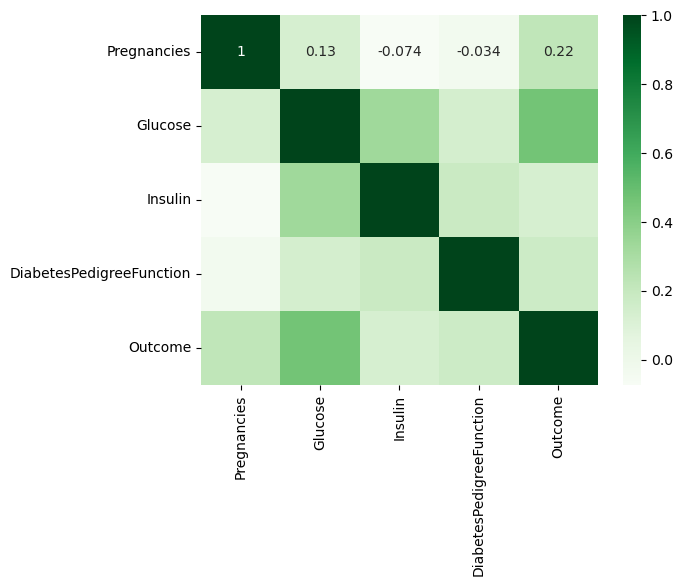

In [135]:
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [136]:
data.drop_duplicates()


,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148,0,0.627,1
1,1,85,0,0.351,0
2,8,183,0,0.672,1
3,1,89,94,0.167,0
4,0,137,168,2.288,1
...,...,...,...,...,...
763,10,101,180,0.171,0
764,2,122,0,0.340,0
765,5,121,112,0.245,0
766,1,126,0,0.349,1


In [137]:
data.describe()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,0.471876,0.348958
std,3.369578,31.972618,115.244002,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,0.000000,0.243750,0.000000
50%,3.000000,117.000000,30.500000,0.372500,0.000000
75%,6.000000,140.250000,127.250000,0.626250,1.000000
max,17.000000,199.000000,846.000000,2.420000,1.000000


In [138]:
x = data.drop(columns=['Outcome'],axis=1)
y = data['Outcome']

In [139]:
x

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction
0,6,148,0,0.627
1,1,85,0,0.351
2,8,183,0,0.672
3,1,89,94,0.167
4,0,137,168,2.288
...,...,...,...,...
763,10,101,180,0.171
764,2,122,0,0.340
765,5,121,112,0.245
766,1,126,0,0.349


In [140]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [141]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [143]:
x.shape,x_train.shape,x_test.shape

((768, 4), (614, 4), (154, 4))

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [145]:
x_train

array([[ 0.90832902,  0.91569367,  0.3736349 ,  0.67740401],
       [ 0.03644676, -0.75182191, -0.69965674, -0.07049698],
       [-1.12606292,  1.38763205,  5.09271083, -0.11855487],
       ...,
       [ 0.03644676, -0.84620959, -0.69965674, -0.95656442],
       [ 2.0708387 , -1.12937261, -0.69965674, -0.50001442],
       [ 0.32707418,  0.47521786, -0.69965674,  0.52121586]])

In [146]:
x_test

array([[-8.35435497e-01,  2.45735903e+00, -6.99656737e-01,
         2.78594417e+00],
       [-5.44808078e-01, -4.37196330e-01,  1.52162022e-01,
        -1.87638099e-01],
       [ 3.64467611e-02, -1.41253563e+00, -6.99656737e-01,
        -2.26685139e-01],
       [ 3.27074180e-01,  1.41909460e+00,  7.91026091e-01,
         3.62024077e-01],
       [-1.12606292e+00, -3.11346097e-01, -6.99656737e-01,
         5.81288224e-01],
       [-8.35435497e-01, -1.25522284e+00, -3.58929234e-01,
        -5.51075932e-01],
       [ 1.48958386e+00,  9.78618790e-01,  7.56953341e-01,
         1.28113132e+00],
       [-2.54180658e-01,  1.73372019e+00,  6.29180527e-01,
         2.06507574e+00],
       [-5.44808078e-01,  1.92054834e-01,  1.64284485e+00,
         3.40468957e+00],
       [ 6.17701600e-01, -5.63046563e-01,  9.18798905e-01,
        -4.27927575e-01],
       [-2.54180658e-01,  1.16739414e+00,  1.38729922e+00,
         1.15497935e+00],
       [ 3.27074180e-01,  2.07980833e+00,  1.06360809e+00,
      

In [147]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [148]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(128))
#model.add(LeakyReLU(alpha=0.1))

C:\Users\nirma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [150]:
history = model.fit(x_train, y_train,epochs=50,batch_size=16,validation_data=(x_test, y_test))

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5942 - loss: 0.6759 - val_accuracy: 0.7208 - val_loss: 0.5700
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6772 - loss: 0.6231 - val_accuracy: 0.7338 - val_loss: 0.5255
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6540 - loss: 0.6062 - val_accuracy: 0.7792 - val_loss: 0.4933
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7194 - loss: 0.5766 - val_accuracy: 0.7792 - val_loss: 0.4780
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7061 - loss: 0.5898 - val_accuracy: 0.7792 - val_loss: 0.4608
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7530 - loss: 0.5470 - val_accuracy: 0.7792 - val_loss: 0.4499
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7300 - loss: 0.5662 - val_accuracy: 0.7727 - val_loss: 0.4573
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7316 - loss: 0.5399 - val_accuracy: 0.7922 - val_loss

In [151]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,301 (28.52 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,868 (19.02 KB)

In [157]:
y_pred = (model.predict(x_test)>0.5).astype("int64")
accuracy = accuracy_score(y_test,y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [156]:
print(f"Model Accuracy is :{accuracy*100:.2f}%")

Model Accuracy is :79.22%


In [199]:
input_data = (1,8,29,26.6)

In [200]:
input_data_as_numpy_array = np.random.rand(786, 4)  # Replace this with your actual data


In [201]:
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(786,4)

In [202]:
std_data = scaler.transform(input_data_reshaped)

In [203]:
# Standardize the data
#std_data = scaler.transform(input_data_reshaped)
''''import numpy as np
from sklearn.preprocessing import StandardScaler

# Example input data
input_data_as_numpy_array = np.random.rand(786, 4)  # Replace this with your actual data

# Reshape the numpy array to ensure it is 2D
input_data_reshaped = input_data_as_numpy_array.reshape(786, 4)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler with the original dataset
scaler.fit(input_data_as_numpy_array)

# Standardize the reshaped data
std_data = scaler.transform(input_data_reshaped)

print(std_data)
print("Shape after standardization:", std_data.shape)
'''

'\'import numpy as np\nfrom sklearn.preprocessing import StandardScaler\n\n# Example input data\ninput_data_as_numpy_array = np.random.rand(786, 4)  # Replace this with your actual data\n\n# Reshape the numpy array to ensure it is 2D\ninput_data_reshaped = input_data_as_numpy_array.reshape(786, 4)\n\n# Initialize the StandardScaler\nscaler = StandardScaler()\n\n# Fit the scaler with the original dataset\nscaler.fit(input_data_as_numpy_array)\n\n# Standardize the reshaped data\nstd_data = scaler.transform(input_data_reshaped)\n\nprint(std_data)\nprint("Shape after standardization:", std_data.shape)\n'

In [197]:
prediction = model.predict(std_data)
#print(prediction)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [198]:
if(prediction[0]==0):
    print("Not Diagnoside")
else:
    print("Diognized")

Diognized
